In [18]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import math
import seaborn as sns 

In [106]:
df = pd.read_csv('diabetic_data.csv')
df1 = df.copy()

In [107]:
df1.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

# Feature selection

In [5]:
### reason for selecting variables here

In [112]:
features = ['age', 'race', 'insulin','gender', 'max_glu_serum']
df_selected_features = df1[features]

In [113]:
for i in df_selected_features.columns:
    print()
    print(i + ':')
    print()
    print(df_selected_features[i].value_counts())


age:

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

race:

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

insulin:

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

gender:

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

max_glu_serum:

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64


In [114]:
# Convert categorical features to numerical
obj_df = df_selected_features.select_dtypes(include=['object']).copy()
obj_df = obj_df.astype('category')

for i in obj_df.columns:
    obj_df[i] = obj_df[i].cat.codes

obj_df.head(3)

,age,race,insulin,gender,max_glu_serum
0,0,3,1,0,2
1,1,3,3,0,2
2,2,1,1,0,2


# EDA

In [115]:
# function for bar plot
def bar_plot(df, variable, ylabel, xlabel, title):    
    plt.figure(figsize = (10,6))
    (df[variable].value_counts().sort_index()/len(df)).plot(kind='bar')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

### Bar graphs

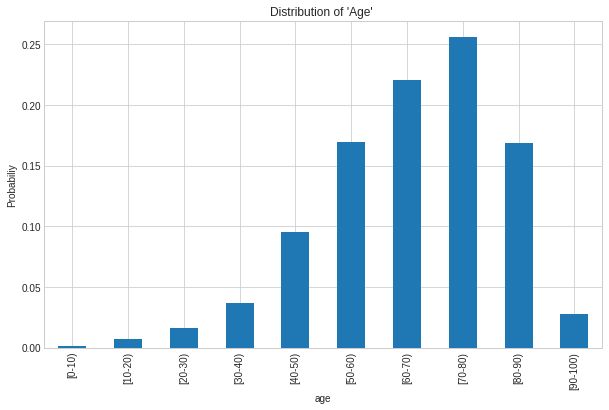

In [116]:
bar_plot(df_selected_features, "age", "Probabiliy", "age", "Distribution of 'Age' ")

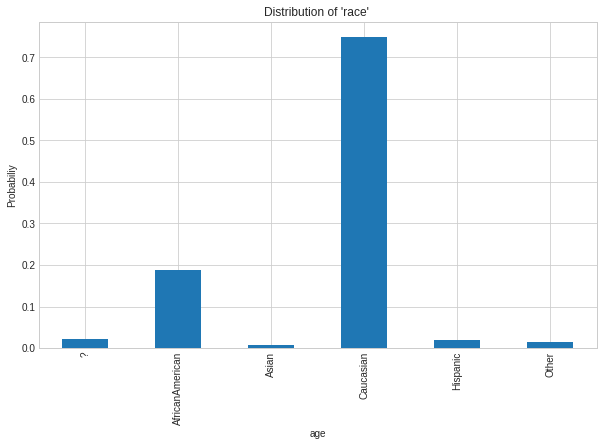

In [117]:
bar_plot(df_selected_features, "race", "Probabiliy", "age", "Distribution of 'race' ")

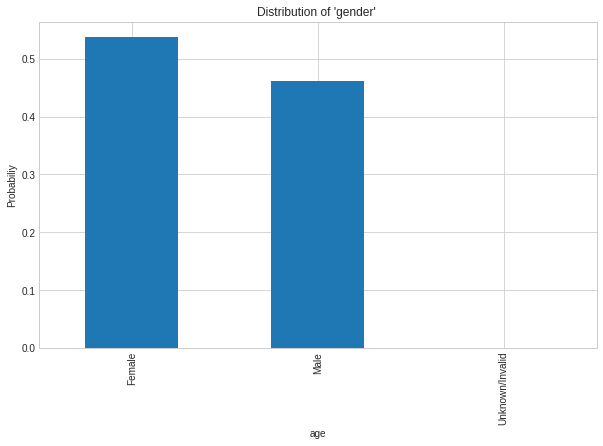

In [118]:
bar_plot(df_selected_features, "gender", "Probabiliy", "age", "Distribution of 'gender' ")

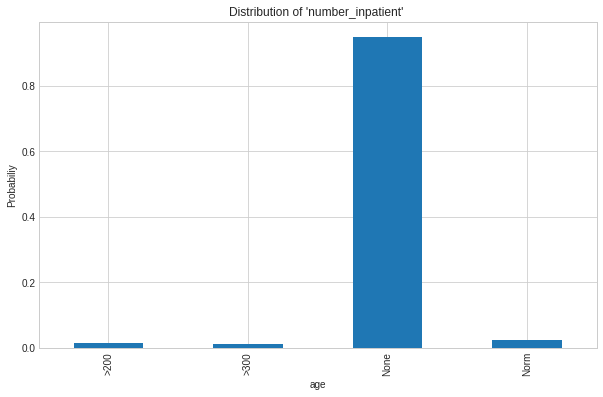

In [119]:
bar_plot(df_selected_features, "max_glu_serum", "Probabiliy", "age", "Distribution of 'number_inpatient' ")

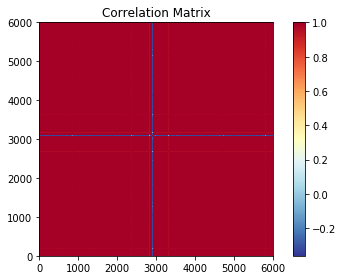

In [14]:
import statsmodels.graphics.api as smg
corr_matrix = np.corrcoef(obj_df.iloc[:6000,:])
smg.plot_corr(corr_matrix)
plt.show()

In [120]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

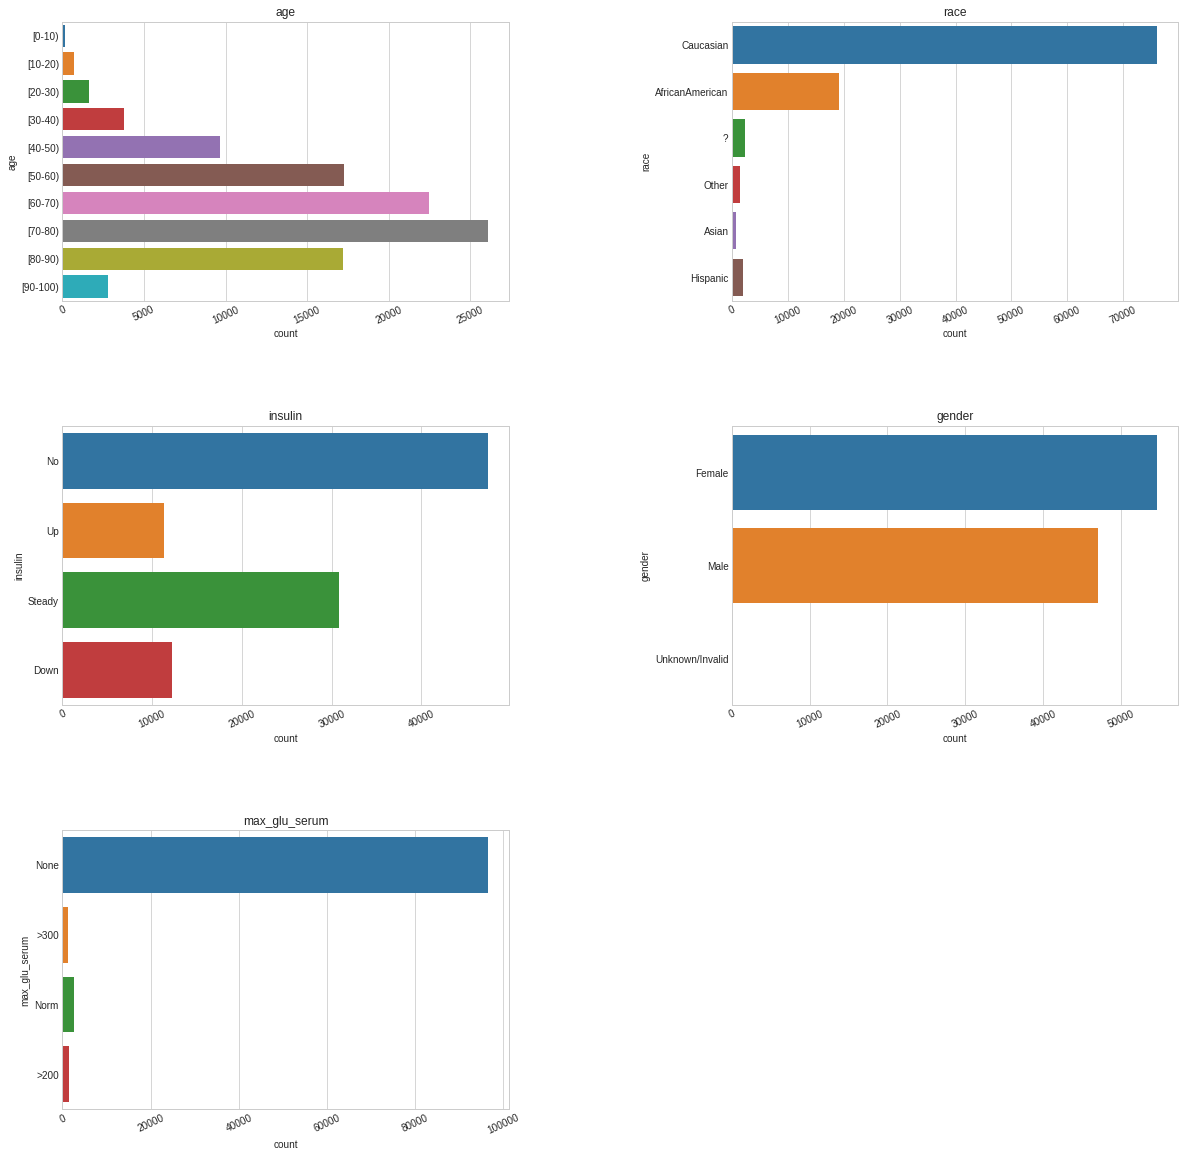

In [121]:
plot_distribution(df_selected_features, cols=2, width=20, height=20, hspace=0.45, wspace=0.5)

In [88]:
#Age plot

[[Text(0, 0, '[0-10)'),
  Text(0, 0, '[10-20)'),
  Text(0, 0, '[20-30)'),
  Text(0, 0, '[30-40)'),
  Text(0, 0, '[40-50)'),
  Text(0, 0, '[50-60)'),
  Text(0, 0, '[60-70)'),
  Text(0, 0, '[70-80)')]]

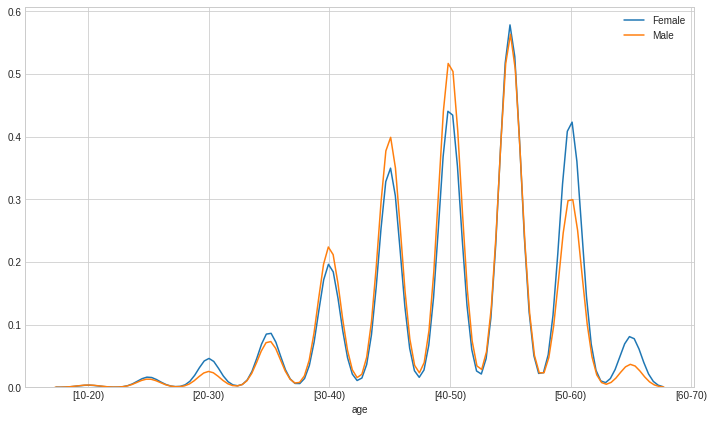

In [125]:
# age comparisons
ylabel_age = np.unique(df_selected_features['age']).tolist()
plt.figure(figsize=(12,7))
a = sns.distplot(obj_df.loc[df_selected_features['gender'] == 'Female']['age'], bins=10, kde=True, hist=False, label='Female')
a = sns.distplot(obj_df.loc[df_selected_features['gender'] == 'Male']['age'], bins=10, kde=True, hist=False, label='Male')
a.set(xticklabels=ylabel_age)



[[Text(0, 0, '[0-10)'),
  Text(0, 0, '[10-20)'),
  Text(0, 0, '[20-30)'),
  Text(0, 0, '[30-40)'),
  Text(0, 0, '[40-50)'),
  Text(0, 0, '[50-60)'),
  Text(0, 0, '[60-70)'),
  Text(0, 0, '[70-80)')]]

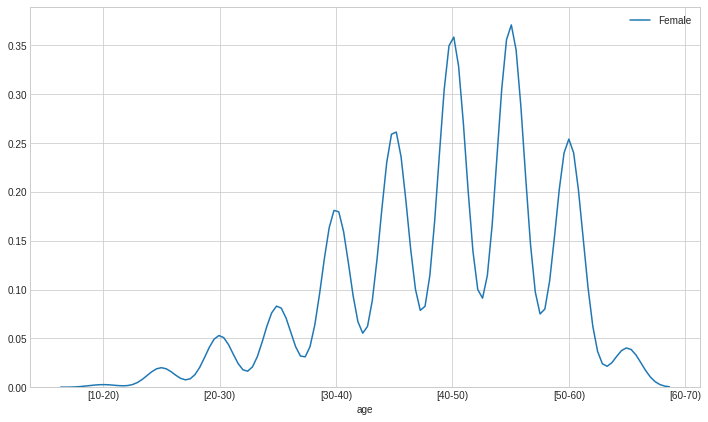

In [141]:
# Insulin levels age
plt.figure(figsize=(12,7))
label_insulin = np.unique(df_selected_features['age']).tolist()
insulinplot = sns.distplot(obj_df.loc[df_selected_features['insulin'] == 'Up']['age'], kde=True, hist=False, label='Female')
insulinplot.set(xticklabels=label_insulin)